<a href="https://colab.research.google.com/github/NickPetrilli/AI/blob/main/lab04_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Artificial Intelligence
Lab 04

By R. Coleman, Ph.D.

---
The goal of this lab is to get some practice loading and encoding the iris data.

Before you start, read the detailed lab instructions [here](https://docs.google.com/document/d/1JB3bIezkTqMdA2V0Fb3l66-ZOSbwizPfCM_cWv2RXM4/edit?usp=sharing).

At the bottom of this notebook you will find the delivery instructions.

---

In [ ]:
# Step 1: Import the Pandas library
import pandas as pd

# Step 2: Read in the data to a DataFrame using the CSV reader method
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)

In [ ]:
df.shape

(150, 5)

In [ ]:
print('RAW data:')
df.head()

RAW data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Step 3: Randomize the rows of the dataset since the data are typically ordered by species.
from sklearn.utils import shuffle
df = shuffle(df, random_state=42).reset_index(drop=True)


## sklearn vs. tensorflow
sklearn or scikit-learn is focused more broadly on ML whereas tensorflow is focused on more neural networks and DL.

For more details see [Scikit-learn vs TensorFlow: A Detailed Comparison](https://www.simplilearn.com/scikit-learn-vs-tensorflow-article#:~:text=Scikit%2Dlearn%20and%20TensorFlow%20were,use%20is%20for%20neural%20networks)

In [ ]:
print('SHUFFLED data:')
df.head()

SHUFFLED data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,6.1,2.8,4.7,1.2,versicolor
1,5.7,3.8,1.7,0.3,setosa
2,7.7,2.6,6.9,2.3,virginica
3,6.0,2.9,4.5,1.5,versicolor
4,6.8,2.8,4.8,1.4,versicolor


In [ ]:
# Step 4: Get summary statistics and check against with what we know about the data.
print("Summary statistics:")
df.describe()

Summary statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Step 5: Check for missing values -- we may have to deal with these.
print("Missing values:")
df.isnull().sum()

Missing values:


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Correlation matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


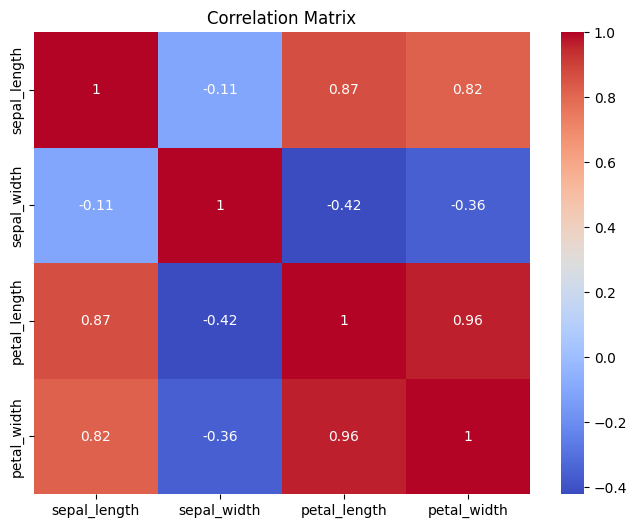

In [ ]:
# Step 6: Get more descriptive info about the data.

# Step 6.1: Calculate the correlation between features
correlation = df.corr(numeric_only=True)
print("Correlation matrix:")
print(correlation)

# # Step 6.2: Visualize the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

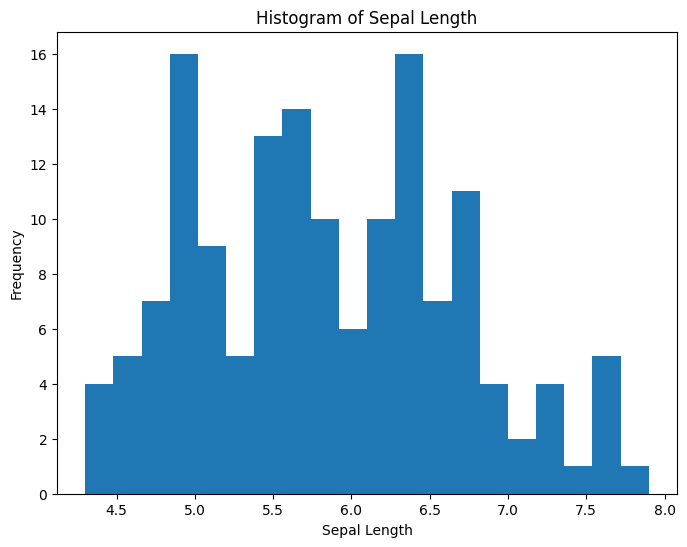

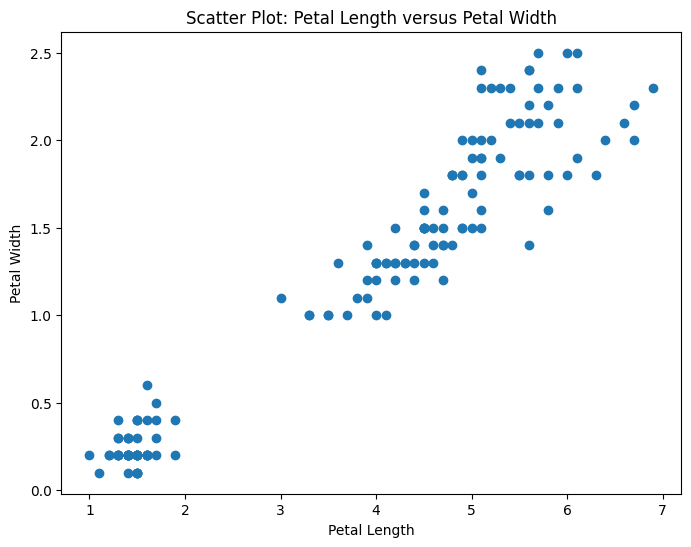

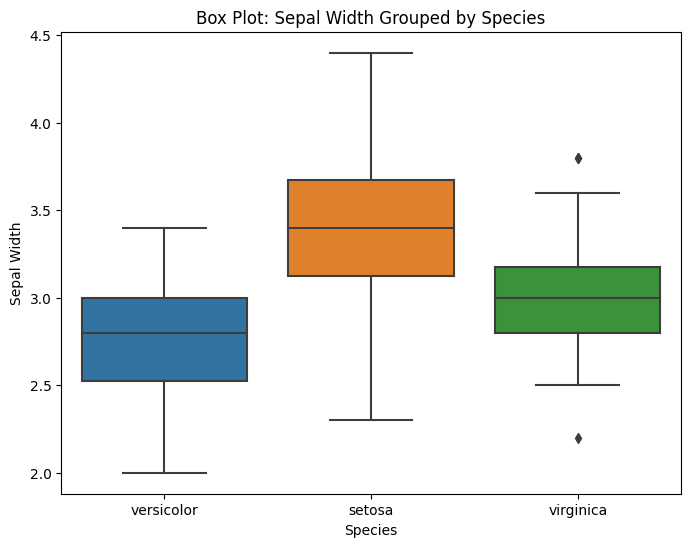

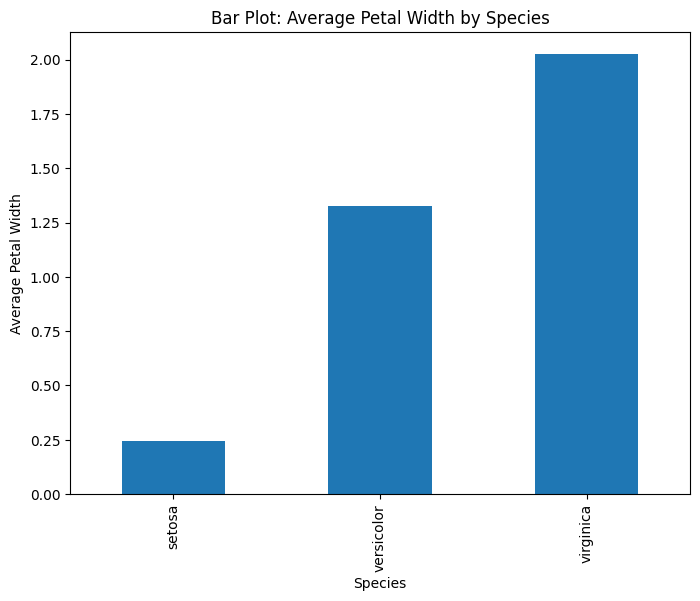

In [ ]:
# Step 7: Perform further analysis.

# Step 7.1 Histogram of 'sepal_length'
plt.figure(figsize=(8, 6))
plt.hist(df['sepal_length'], bins=20)
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

# Stpe 7.2: Scatter plot of 'petal_length' versus 'petal_width'
plt.figure(figsize=(8, 6))
plt.scatter(df['petal_length'], df['petal_width'])
plt.title("Scatter Plot: Petal Length versus Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# Step 7.3: Box plot of 'sepal_width' grouped by 'species'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['species'], y=df['sepal_width'])
plt.title("Box Plot: Sepal Width Grouped by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.show()

# Step 7.4: Bar plot of average 'petal_width' by 'species'
average_petal_width_by_species = df.groupby('species')['petal_width'].mean()
plt.figure(figsize=(8, 6))
average_petal_width_by_species.plot(kind='bar')
plt.title("Bar Plot: Average Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Width")
plt.show()

In [ ]:
# Step 8: Normalize numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# These are the numeric columns
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Each column gets transformed independently to their unique range as a numpy array.
normalized_columns = scaler.fit_transform(df[numeric_columns])

# Convert the numpy array to a pandas dataframe
df_normalized = pd.DataFrame(normalized_columns, columns=numeric_columns)
df_normalized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.500000,0.333333,0.627119,0.458333
1,0.388889,0.750000,0.118644,0.083333
2,0.944444,0.250000,1.000000,0.916667
3,0.472222,0.375000,0.593220,0.583333
4,0.694444,0.333333,0.644068,0.541667


In [ ]:
# Step 8.1: Denormalize numeric columns

# Each column gets transformed independently to their unique range as a numpy array.
denormalized_columns = scaler.inverse_transform(normalized_columns)

# Convert the numpy array to a pandas dataframe
df_denormalized = pd.DataFrame(denormalized_columns, columns=numeric_columns)
df_denormalized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,2.8,4.7,1.2
1,5.7,3.8,1.7,0.3
2,7.7,2.6,6.9,2.3
3,6.0,2.9,4.5,1.5
4,6.8,2.8,4.8,1.4


In [ ]:
# Step 9: One-hot encode the 'species' column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# One-encode and also get the unbique categories
species_encoded = encoder.fit_transform(df[['species']])

# The categories are stored as nyumpy array of with the first element being an array
species_categories = encoder.categories_[0]

df_species_encoded = pd.DataFrame(species_encoded, columns=species_categories)
df_species_encoded.head()

,setosa,versicolor,virginica
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [ ]:
# Step 9.1: Decode the 'species' column

species_decoded = encoder.inverse_transform(species_encoded)

df_species_decoded = pd.DataFrame(species_decoded)
df_species_decoded.head()

,0
0,versicolor
1,setosa
2,virginica
3,versicolor
4,versicolor


In [ ]:
# Step 10: Put everything together encoded in one dataframe.
df_encoded = pd.concat([df_normalized, df_species_encoded], axis=1)
df_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,0.500000,0.333333,0.627119,0.458333,0.0,1.0,0.0
1,0.388889,0.750000,0.118644,0.083333,1.0,0.0,0.0
2,0.944444,0.250000,1.000000,0.916667,0.0,0.0,1.0
3,0.472222,0.375000,0.593220,0.583333,0.0,1.0,0.0
4,0.694444,0.333333,0.644068,0.541667,0.0,1.0,0.0


# Deliverables
1. Share the answers document as viewable only and paste the link into the assignment shell.
2. Share the notebook as viewable only. Do not remove the outputs. Copy the link and paste it into the assignment shell.
3. Complete the [submission flight checklist](https://docs.google.com/spreadsheets/u/0/d/1lgCttHGUIbCUTrd0TZIm4Nxfy8wy3jnIvNv7cUPJ-Gw/edit).
When done, export the checklist as lab04-checklist.pdf, and upload it to the assignment shell.
